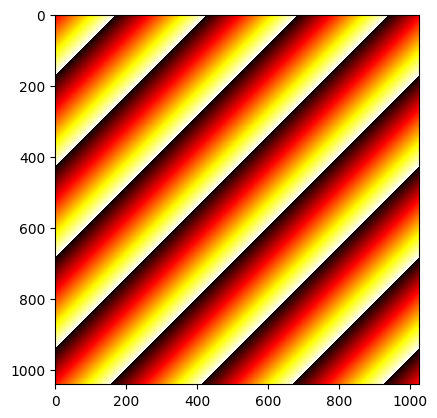

In [3]:
import numpy as np
from PIL import ImageGrab, Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = '/Users/christianjohnson/Downloads/Glare/TestBmp.bmp'
img = np.array(Image.open(path))
img= img/255.

plt.imshow(img, cmap='hot', interpolation='nearest')
plt.show()

[[0.11692836 0.30270304 0.58057926 ... 0.94483116 0.4462966  0.33100901]
 [0.60294463 0.83513196 0.68336756 ... 0.44365093 0.40072636 0.58902447]
 [0.69630001 0.36094101 0.40128111 ... 0.21900309 0.99260873 0.8153879 ]
 ...
 [0.13732516 0.51382688 0.33820908 ... 0.23551305 0.36180364 0.79753434]
 [0.17196984 0.30056354 0.97144801 ... 0.8603755  0.62165233 0.71204634]
 [0.84628743 0.2559472  0.30257206 ... 0.11538406 0.84735939 0.93102137]]


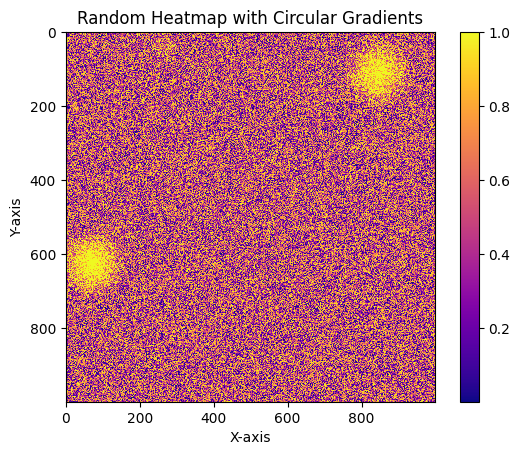

In [4]:
# Size of the heatmap
heatmap_size = 1000

# Number of random center points
num_centers = 5

# Generate a random 2D array
heatmap = np.random.rand(heatmap_size, heatmap_size)

print(heatmap)

# Generate random center points
center_points = np.random.randint(0, heatmap_size, size=(num_centers, 2))

# Apply circular gradients around center points
for center in center_points:
    center_intensity = np.random.rand()
    radius_factor = np.random.uniform(1, 2)
    region_radius = int(radius_factor * heatmap_size / 10)

    for i in range(heatmap_size):
        for j in range(heatmap_size):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            gradient_value = center_intensity - distance / region_radius
            heatmap[i, j] += max(0, gradient_value)  # Ensure values are not below zero

# Normalize values to be in the range [0, 1]
heatmap = np.clip(heatmap, 0, 1)

# Create a heatmap using a colormap (e.g., 'viridis')
plt.imshow(heatmap, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.title('Random Heatmap with Circular Gradients')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# this is the random heatmap that has some random hotspots

#print(heatmap)

In [5]:
# takes in a numpy array (1000x1000) and block size

# OLD FUNCTION

def blockedVals(array, jump_Size):
    r = len(array)
    c = len(array[0])
    maxVal=0
    array1 = np.arange(0,r,jump_Size)[:200]
    array2 = np.arange(0,c,jump_Size)[:200]
    coord=(0,0)
    for i in array1:
        for j in array2:
            blockSum = 0
            for i2 in range(jump_Size):
                for j2 in range(jump_Size):
                    blockSum += img[i+i2][j+j2]
            if(blockSum/(jump_Size*jump_Size)>maxVal):
                maxVal=(blockSum/(jump_Size*jump_Size))
                coord=(i,j)
            #print(blockSum/(jump_Size*jump_Size))
    print(maxVal)
    print(coord)
    return(coord)

In [6]:
"""
    universal_blocking takes an array of of any shape and a jump value. 
    It then finds the maximum average value of a block of size jump x jump
"""
def universal_blocking(array, jump):
    # Deriving the array demensions then trimming for ease of indexing
    r, c = array.shape
    r += r%10
    c -= c%10

    ar1 = np.arange(0,r, jump)
    print(ar1)
    ar2 = np.arange(0,c, jump)
    max_value = 0.
    coord = ()

    for i in ar1:
        for j in ar2:
            b_sum = 0
            for i2 in range(jump):
                for j2 in range(jump):
                    b_sum += array[i+i2][j+j2]
            current_average = b_sum/(jump^2)
            if(current_average > max_value):
                print(20, " ", current_average, (i, j))
                max_value = current_average
                coord=(i,j)
    return coord

coordmt = universal_blocking(heatmap,10)
print(coordmt)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530
 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710
 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890
 900 910 920 930 940 950 960 970 980 990]
20   6.29201775375875 (0, 0)
20   6.474434709608669 (0, 10)
20   7.000854999683337 (0, 150)
20   7.285310371432326 (0, 270)
20   7.3963506768741265 (0, 600)
20   7.690287285573689 (10, 270)
20   8.315641555073453 (20, 250)
20   8.811420657775594 (30, 250)
20   8.841007092640893 (30, 270)
20   8.972923758842986 (40, 840)
20   9.130288342947503 (40, 860)
20   9.653800681094426 (50, 820)
20   9.76199125234153 (50, 830)
20   10.161209801045057 (50, 840)
20   10.173460253432395 (60, 820)
20   10.366482320589402 (60, 840)
20   10.769910162151499 (70, 830)
20   10.845655454524021 (70, 840)
20 

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530
 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710
 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890
 900 910 920 930 940 950 960 970 980 990]
20   6.29201775375875 (0, 0)
20   6.474434709608669 (0, 10)
20   7.000854999683337 (0, 150)
20   7.285310371432326 (0, 270)
20   7.3963506768741265 (0, 600)
20   7.690287285573689 (10, 270)
20   8.315641555073453 (20, 250)
20   8.811420657775594 (30, 250)
20   8.841007092640893 (30, 270)
20   8.972923758842986 (40, 840)
20   9.130288342947503 (40, 860)
20   9.653800681094426 (50, 820)
20   9.76199125234153 (50, 830)
20   10.161209801045057 (50, 840)
20   10.173460253432395 (60, 820)
20   10.366482320589402 (60, 840)
20   10.769910162151499 (70, 830)
20   10.845655454524021 (70, 840)
20 

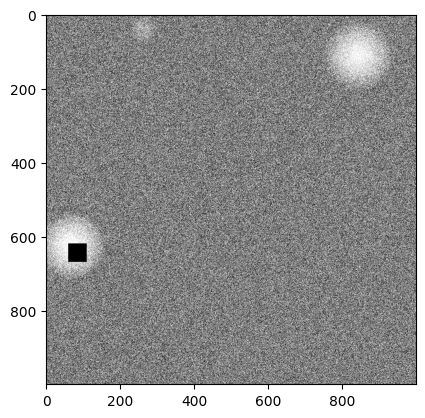

In [8]:
def overlay(array, jump):
    coord = universal_blocking(heatmap,jump)
    for i in range(50):
        for j in range(50):
            array[(coord[0]+i),(coord[1]+j)] = 0
    array*=255
    im = Image.fromarray(array)
    imgplot = plt.imshow(im)
print(overlay(heatmap,10))

0.984313725490196
(0, 675)


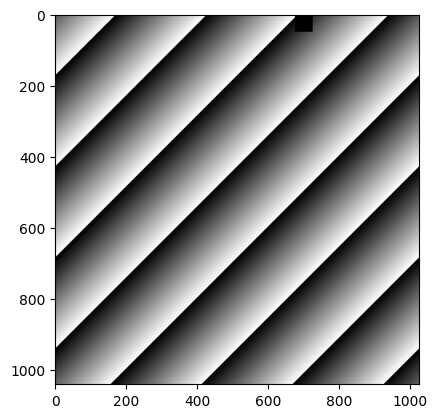

In [9]:
#coord=blockedVals(heatmap,5)
coord = blockedVals(img,5)
for i in range(50):
    for j in range(50):
        img[(coord[0]+i),(coord[1]+j)]=0
img=img*255
im = Image.fromarray(img)
imgplot = plt.imshow(im)